<h1 style="text-align:center;;font-weight:bold"><i>Assignment - 2</i></h1>
<h3 style="text-align:center;;font-weight:bold"><i>Image Classification Using CNN</i></h3>
<h3 style="text-align:center">Vijay Kumar, 16th Jan. ,2022</h3>
<h4 style="text-align:center">Email: 2020aiml525@wilp.bits-pilani.ac.in</h4>

### ***What exactly is a CNN?***
In deep learning, a convolutional neural network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery. Now when we think of a neural network we think about matrix multiplications but that is not the case with ConvNet. It uses a special technique called Convolution. Now in mathematics convolution is a mathematical operation on two functions that produces a third function that expresses how the shape of one is modified by the other.
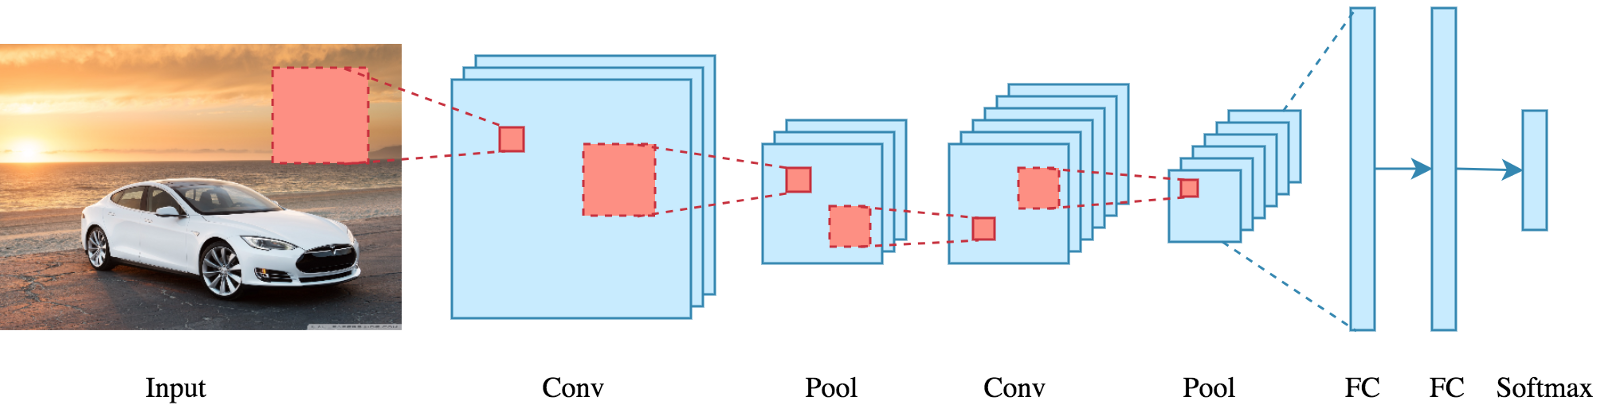

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. In Simple word CNN is used to Classify the Image.

CNN contains many convolutional layers assembled on top of each other, each one competent of recognizing more sophisticated shapes.
With three or four convolutional layers it is viable to recognize handwritten digits and with 25 layers it is possible to differentiate human faces.

In [9]:
# importing the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
print(tf.__version__)


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore')

2.7.0


In [3]:
import os 
my_data_dir='archive'
test_dir = my_data_dir+'/test/'
train_dir = my_data_dir+'/train/'
valid_dir=my_data_dir+'/valid/'

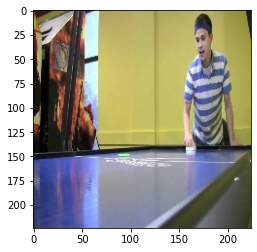

In [4]:
# display the single image
from matplotlib.image import imread
para_cell = train_dir+'/air hockey/001.jpg'
para_img= imread(para_cell)
plt.imshow(para_img)

In [12]:
#defining the image shape
image_shape=para_img.shape
image_shape

(224, 224, 3)

### ***1. Load the images in appropriate data structures in your program, ready to be passed as input to the model for training. Consider input image size to be 224x224x3. [2 points]***
Before feeding the images to CNN. We need to do image processing and Image augmentation.Image augmentation is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. Each copy, however, is different from the other in certain aspects depending on the augmentation techniques you apply like shifting, rotating, flipping, etc.

Applying these small amounts of variations on the original image does not change its target class but only provides a new perspective of capturing the object in real life. And so, we use it is quite often for building deep learning models.

Keras **ImageDataGenerator** class provides a quick and easy way to augment your images. It provides a host of different augmentation techniques like standardization, rotation, shifts, flips, brightness change, and many more.However, the main benefit of using the Keras ImageDataGenerator class is that it is designed to provide real-time data augmentation. Meaning it is generating augmented images on the fly while your model is still in the training stage

In [10]:
# Image augmentation using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               rescale=1.0/255.0, # Rescale the image by normalzing it.
                               horizontal_flip=True,# Allo horizontal flipping
                               featurewise_std_normalization=True
                               
                              )

In [13]:
#creating train,test and validation dataset
train=image_gen.flow_from_directory(train_dir,
                                    batch_size=15,
                                    target_size=image_shape[:2]
                               )
test=image_gen.flow_from_directory(test_dir,
                                    batch_size=15,
                                   shuffle=False,
                                   target_size=image_shape[:2]
                               )
valid=image_gen.flow_from_directory(valid_dir,
                                    batch_size=15,
                                   shuffle=False,
                                    target_size=image_shape[:2]
                               )

Found 10416 images belonging to 73 classes.
Found 365 images belonging to 73 classes.
Found 365 images belonging to 73 classes.


### ***2.Configure the CNN model (use keras tensorflow), an indicative (minimal) configuration is as below. Take activation function (A)=relu. Feel free to use standard values for anything that is not mentioned (eg, take pool size 2x2, filter size 3x3, and so on). [3 points]***

conv --> A --> pool

(conv --> A) --> (conv --> A) --> pool

full connected layer --> A

softmax classifier

### ***Base Model***

In [55]:
# Base Model
model=Sequential()

#Adding first Convolution Layer
model.add(Conv2D(filters=32,kernel_size=(2,2),activation='relu',input_shape=image_shape))
model.add(MaxPool2D(pool_size=(2, 2),strides=2))

#adding 2nd convolution layer
model.add(Conv2D(filters=32,kernel_size=(1,1),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=2))
#adding flat layer
model.add(Flatten())

#adding a Dense Layer
model.add(Dense(256,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(73,activation='softmax'))

#compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 111, 111, 32)      1056      
                                                                 
 conv2d_42 (Conv2D)          (None, 111, 111, 32)      1056      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 96800)           

In [143]:
# define early stop to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=5,mode='min')

### ***3. Train the CNN model for E epoch (take E=25), save the train_loss, train_acc, validation_loss, validation_acc for each epoch and plot it after training has finished. [3 points]***

In [56]:
# fit the model
model.fit(train,epochs=25,validation_data=test,callbacks=[early_stop])

Epoch 1/25
695/695 [==============================] - 137s 197ms/step - loss: 4.1679 - accuracy: 0.0385 - val_loss: 3.6335 - val_accuracy: 0.1041
Epoch 2/25
695/695 [==============================] - 137s 197ms/step - loss: 3.7027 - accuracy: 0.0868 - val_loss: 3.3087 - val_accuracy: 0.1616
Epoch 3/25
695/695 [==============================] - 136s 196ms/step - loss: 3.5121 - accuracy: 0.1101 - val_loss: 3.0389 - val_accuracy: 0.2274
Epoch 4/25
695/695 [==============================] - 137s 197ms/step - loss: 3.3919 - accuracy: 0.1340 - val_loss: 2.9329 - val_accuracy: 0.2548
Epoch 5/25
695/695 [==============================] - 136s 195ms/step - loss: 3.3004 - accuracy: 0.1521 - val_loss: 2.8178 - val_accuracy: 0.2767
Epoch 6/25
695/695 [==============================] - 136s 195ms/step - loss: 3.2380 - accuracy: 0.1615 - val_loss: 2.6808 - val_accuracy: 0.3151
Epoch 7/25
695/695 [==============================] - 136s 195ms/step - loss: 3.1693 - accuracy: 0.1695 - val_loss: 2.5595 -

<Figure size 1152x576 with 0 Axes>

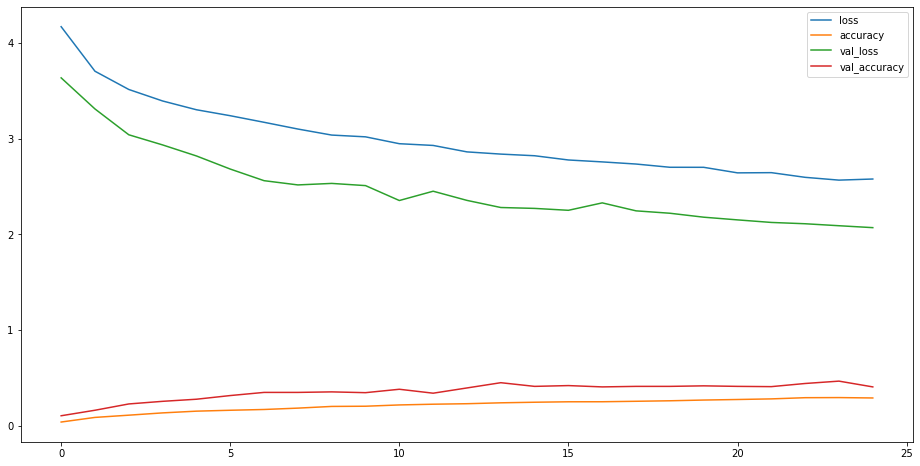

In [57]:
#ploting the training history
history_model=pd.DataFrame(model.history.history)
history_model.column='Loss'
history_model.head()

plt.figure(figsize=(16,8))
history_model.plot(figsize=(16,8))

### ***4. Evaluate the trained CNN model on test data. Print classification results. [1 point]***

In [58]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

Y_pred = np.argmax(model.predict(test),axis=1)
print('Accuracy:{}'.format(accuracy_score(test.classes, Y_pred)))
print('F1-Score:%.2f'%f1_score(test.classes, Y_pred,average='weighted'))
print('Report:{}'.format(classification_report(test.classes,Y_pred)))

Accuracy:0.4301369863013699
F1-Score:0.41
Report:              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.00      0.00      0.00         5
           2       0.33      0.20      0.25         5
           3       1.00      0.60      0.75         5
           4       0.75      0.60      0.67         5
           5       0.67      0.40      0.50         5
           6       0.25      0.20      0.22         5
           7       0.40      0.40      0.40         5
           8       0.67      0.80      0.73         5
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         5
          11       1.00      0.80      0.89         5
          12       0.80      0.80      0.80         5
          13       0.40      0.80      0.53         5
          14       0.33      0.40      0.36         5
          15       0.50      0.40      0.44         5
          16       1.00      0.2

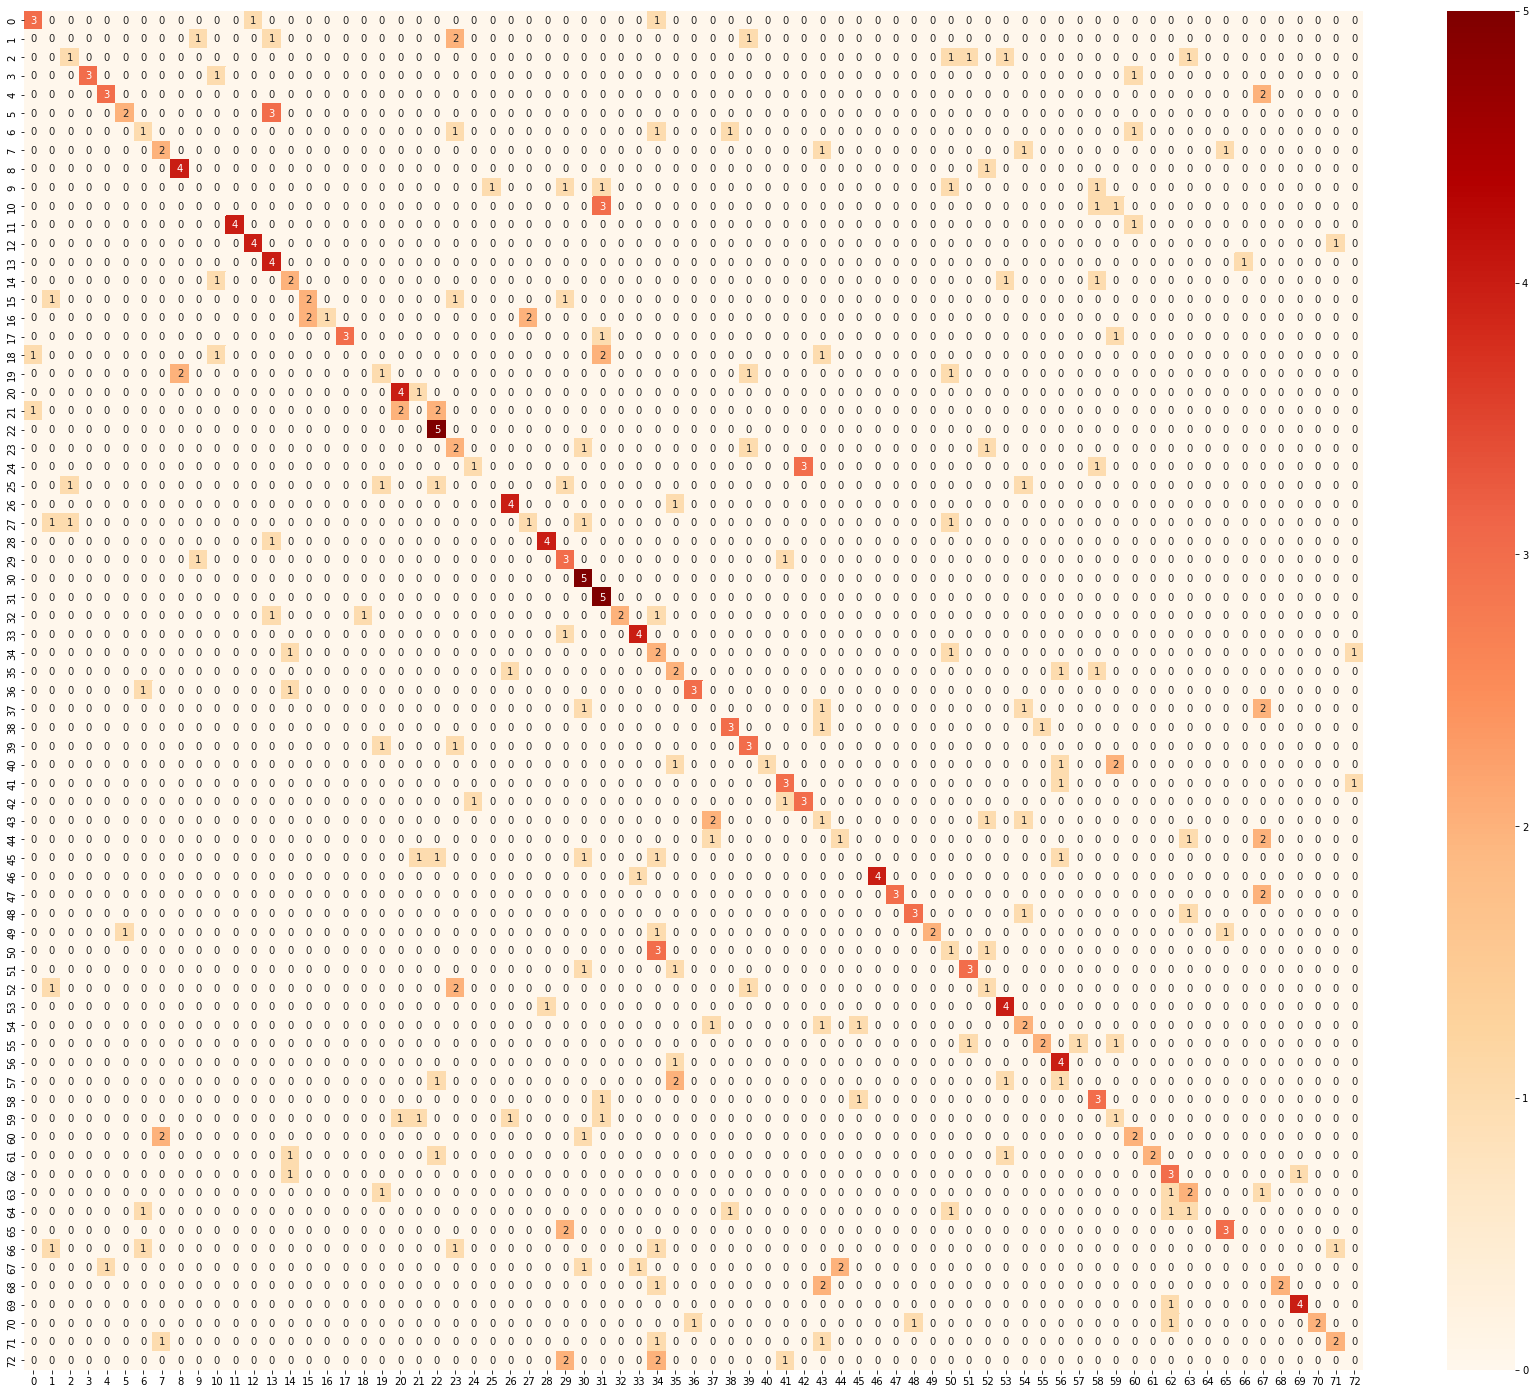

In [59]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test.classes,Y_pred)
plt.figure(figsize=(30,25))
sns.heatmap(cm,annot=True,fmt='d',cmap='OrRd')

In [60]:
# eveulate the model
evl=model.evaluate(valid)

25/25 [==============================] - 4s 177ms/step - loss: 2.1022 - accuracy: 0.4110


In [61]:
# save the model
model.save('model.h5')

#load the model
from tensorflow.keras.models import load_model
#m=load_model('model.h5')

### ***5. Can you try to make changes in any way in the CNN model and improve your test accuracy? Let's call the model constructed as per step-2 above as 'default' and the improvement as 'improved' model. Plot precision and recall for default and improved model in a single bar plot. [3 points]***
We can try to improve the model by extra layes ,we can also add nomalization layes and dropout layers.

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
image_gen = ImageDataGenerator(
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1.0/255.0, # Rescale the image by normalzing it.
                               horizontal_flip=True, # Allo horizontal flipping
                              )

print('Creating Train,Test and Valid Dataset....')
#creating train,test and validation dataset
train=image_gen.flow_from_directory(train_dir,
                                    batch_size=100,
                                    target_size=image_shape[:2]
                               )
test=image_gen.flow_from_directory(test_dir,
                                    batch_size=100,
                                   shuffle=False,
                                   target_size=image_shape[:2]
                               )
valid=image_gen.flow_from_directory(valid_dir,
                                    batch_size=100,
                                   shuffle=False,
                                    target_size=image_shape[:2]
                               )

Creating Train,Test and Valid Dataset....
Found 10416 images belonging to 73 classes.
Found 365 images belonging to 73 classes.
Found 365 images belonging to 73 classes.


### ***Improved Model***

In [18]:
# Improved Model
model_3=Sequential()
model.add(BatchNormalization())
#Adding first Convolution Layer
model_3.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=image_shape))
model.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size=(2, 2),strides=2))

#adding 2nd convolution layer
model_3.add(Conv2D(filters=64,kernel_size=(1,1),activation='relu'))
model_3.add(Conv2D(filters=64,kernel_size=(1,1),activation='relu'))
model.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size=(1, 1),strides=2))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(filters=32,kernel_size=(1,1),activation='relu'))
model.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size=(1, 1),strides=2))

#adding flat layer
model_3.add(Flatten())

#adding a Dense Layer
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(100,activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(73,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(0.01)))

#compile the model
model_3.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 221, 221, 32)      1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 64)      2112      
                                                                 
 conv2d_5 (Conv2D)           (None, 110, 110, 64)      4160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 55, 55, 64)       

In [19]:
# fit the model
model_3.fit(train,epochs=50,validation_data=test,callbacks=[early_stop])

Epoch 1/50
105/105 [==============================] - 134s 1s/step - loss: 4.6968 - accuracy: 0.0187 - val_loss: 4.2311 - val_accuracy: 0.0493
Epoch 2/50
105/105 [==============================] - 130s 1s/step - loss: 4.0433 - accuracy: 0.0562 - val_loss: 3.6397 - val_accuracy: 0.0849
Epoch 3/50
105/105 [==============================] - 130s 1s/step - loss: 3.7495 - accuracy: 0.0824 - val_loss: 3.4194 - val_accuracy: 0.1260
Epoch 4/50
105/105 [==============================] - 131s 1s/step - loss: 3.5710 - accuracy: 0.1142 - val_loss: 3.1492 - val_accuracy: 0.2384
Epoch 5/50
105/105 [==============================] - 130s 1s/step - loss: 3.4047 - accuracy: 0.1423 - val_loss: 2.9553 - val_accuracy: 0.2658
Epoch 6/50
105/105 [==============================] - 131s 1s/step - loss: 3.2576 - accuracy: 0.1750 - val_loss: 2.8323 - val_accuracy: 0.2685
Epoch 7/50
105/105 [==============================] - 130s 1s/step - loss: 3.1412 - accuracy: 0.1935 - val_loss: 2.7214 - val_accuracy: 0.2822

<Figure size 1152x576 with 0 Axes>

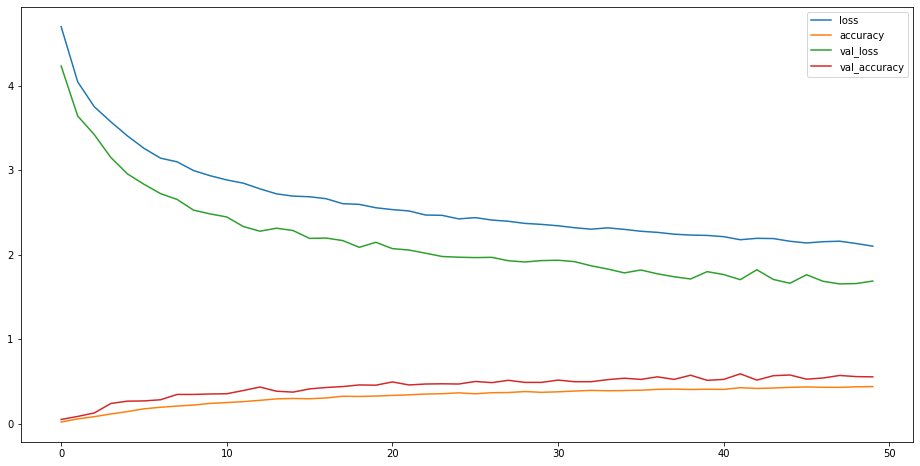

In [20]:
#ploting the training history
history_model=pd.DataFrame(model_3.history.history)
history_model.column='Loss'
history_model.head()

plt.figure(figsize=(16,8))
history_model.plot(figsize=(16,8))

In [25]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore')

Y_pred = np.argmax(model_3.predict(test),axis=1)
print('Accuracy:{}'.format(accuracy_score(test.classes, Y_pred)))
print('F1-Score:%.2f'%f1_score(test.classes, Y_pred,average='weighted'))
print('Report:{}'.format(classification_report(test.classes,Y_pred)))

Accuracy:0.5506849315068493
F1-Score:0.53
Report:              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.50      0.20      0.29         5
           2       0.50      0.20      0.29         5
           3       1.00      0.40      0.57         5
           4       0.50      0.60      0.55         5
           5       1.00      0.60      0.75         5
           6       0.22      0.40      0.29         5
           7       0.38      0.60      0.46         5
           8       0.67      0.80      0.73         5
           9       0.17      0.20      0.18         5
          10       1.00      0.20      0.33         5
          11       0.80      0.80      0.80         5
          12       0.60      0.60      0.60         5
          13       0.45      1.00      0.62         5
          14       0.36      0.80      0.50         5
          15       1.00      0.40      0.57         5
          16       0.62      1.0

In [27]:
# eveulate the model
evl=model_3.evaluate(valid)

4/4 [==============================] - 4s 1s/step - loss: 1.7774 - accuracy: 0.5315


In [16]:
# save the model
model_3.save('improved_model.h5')

In [64]:
#load the model
from tensorflow.keras.models import load_model
model_3=load_model('improved_model.h5')
print('Model Loaded Successfully!')

Model Loaded Successfully!


73


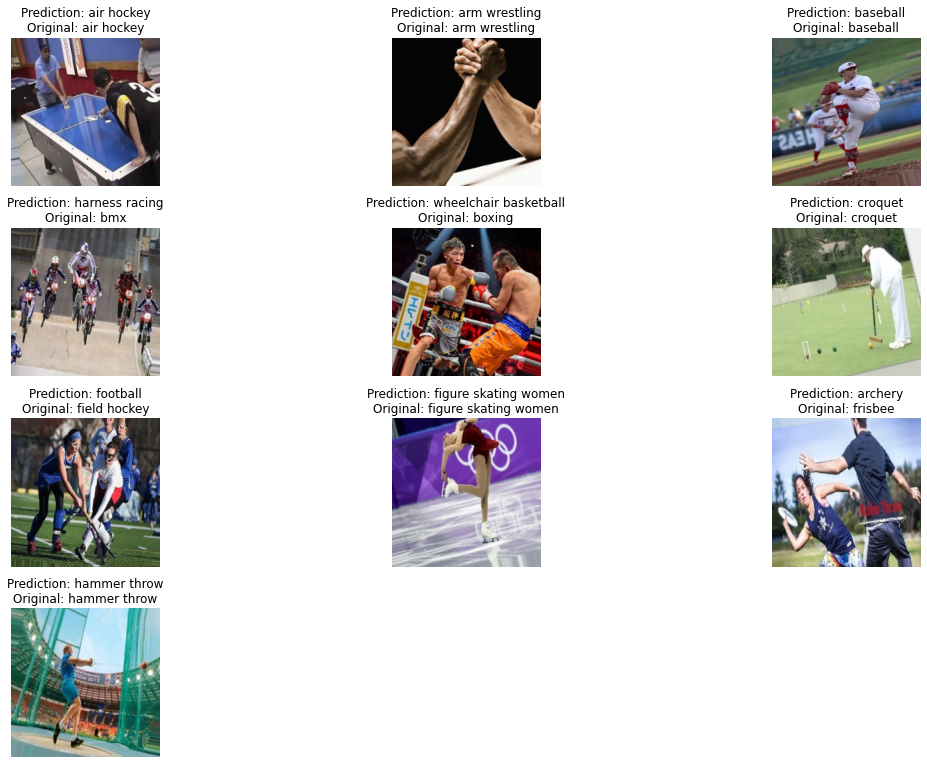

In [118]:
# printing first 10 prediction vs original prediction
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
labels = list(test.class_indices.keys())
print(len(labels))
for i in range(10):
    image,label = test.next()
    model_pred = model_3.predict(image)
    plt.subplot(6,3,i+1)
    plt.imshow(image[i])
    plt.title(f"Prediction: {labels[np.argmax(model_pred[i])]}\nOriginal: {labels[np.argmax(label[i])]}")
    plt.subplots_adjust(top= 1.25)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [132]:
#function to predict single image
def get_prediction(data):
    target=list(train.class_indices.keys())
    from tensorflow.keras.preprocessing import image
    para_img= imread(data)
    my_image = image.img_to_array(para_img)
    my_image = np.expand_dims(my_image, axis=0)
    predictions = np.argmax(model_3.predict(my_image))
    plt.imshow(para_img)
    plt.title(f'Predicted:{target[predictions]}')

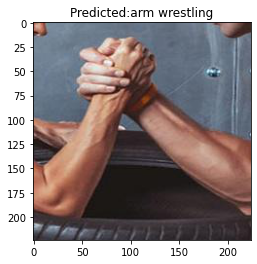

In [134]:
#Classifying the image for single image
from PIL import Image
image = Image.open("archive/valid/arm wrestling/1.jpg")
image = image.resize((224,224),Image.ANTIALIAS)
new_image=image.save(fp="newimage.jpg")
get_prediction('newimage.jpg')

### ***Transfer Learning***

#### ***What is transfer learning?***
Transfer learning is about leveraging feature representations from a pre-trained model, so you don’t have to train a new model from scratch. 

The pre-trained models are usually trained on massive datasets that are a standard benchmark in the computer vision frontier. The weights obtained from the models can be reused in other computer vision tasks. 

These models can be used directly in making predictions on new tasks or integrated into the process of training a new model. Including the pre-trained models in a new model leads to lower training time and lower generalization error.  

Transfer learning is particularly very useful when you have a small training dataset. In this case, you can, for example, use the weights from the pre-trained models to initialize the weights of the new model.

In [145]:
#load the model
from tensorflow.keras.models import load_model
model=load_model('model.h5')
print('Model Loaded Successfully!')

Model Loaded Successfully!


In [3]:
!python -V

Python 3.9.7
